##### LaTeX Table

In [ ]:
import glob
import os
import pandas as pd

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscarpy
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4py

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscar-repetitions
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4-repetitions
!mv lm1-2b8-55b-oscar-repetitions/2b855b55boscar lm1-2b8-55b-oscarpy/
!mv lm1-2b8-55b-c4-repetitions/2b855b55bc4 lm1-2b8-55b-c4py/

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscarseeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4seeds
!mv lm1-2b8-55b-oscar-repetitions/2b855b55boscar lm1-2b8-55b-oscarpy/
!mv lm1-2b8-55b-c4-repetitions/2b855b55bc4 lm1-2b8-55b-c4py/

!mv lm1-2b8-55b-oscarseeds/* lm1-2b8-55b-oscarpy/
!mv lm1-2b8-55b-c4seeds/* lm1-2b8-55b-c4py/


!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4py
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4pyseeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4-repetitions
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4seeds
!mv lm1-4b2-84b-c4pyseeds/* lm1-4b2-84b-c4py/
!mv lm1-4b2-84b-c4-repetitions/4b284b84bc4v2 lm1-4b2-84b-c4py/
!mv lm1-4b2-84b-c4seeds/* lm1-4b2-84b-c4py/



TASK_TO_BASELINE = {
    "anli_r1": 1/3,
    "anli_r2": 1/3,
    "anli_r3": 1/3,
    "arc_challenge": 1/4,
    "arc_easy": 1/4,
    "boolq": 1/2,
    "cb": 1/3,
    "copa": 1/2,
    "hellaswag": 1/4,
    "piqa": 1/2,
    "rte": 1/2,
    "sciq": 1/4,
    "storycloze_2016": 1/4,
    "winogrande": 1/2,
    "babi": 0,
}


MODELS = {
    "lm1-2b8-55b-c4py": {
        "2b855b50c4py",
        "2b855b60c4py",
        "2b855b70c4py",
        "2b855b80c4py",
        "2b855b90c4py",
        "2b855b55bc4",
        "2b855b55bc4seed1",
        "2b855b55bc4seed2",
        "2b855b55bc4seed3",
        "2b855b55bc4seed4",
    },
    "lm1-2b8-55b-oscarpy": {
        "2b855b50oscarpy",
        "2b855b60oscarpy",
        "2b855b70oscarpy",
        "2b855b80oscarpy",
        "2b855b90oscarpy",
        "2b855b55boscar",
        "2b855b55boscarseed1",
        "2b855b55boscarseed2",
        "2b855b55boscarseed3",
        "2b855b55boscarseed4",
    },
    "lm1-4b2-84b-c4py": {
        "4b284b84b10c4py",
        "4b284b84b20c4py",
        "4b284b84b30c4py",
        "4b284b84b40c4py",
        "4b284b84b50c4py",
        "4b284b84b60c4py",
        "4b284b84b70c4py",
        "4b284b84b80c4py",
        "4b284b84b90c4py",
"4b284b84b10c4pyseed1",
"4b284b84b10c4pyseed2",
"4b284b84b10c4pyseed3",
"4b284b84b10c4pyseed4",
"4b284b84b20c4pyseed1",
"4b284b84b20c4pyseed2",
"4b284b84b20c4pyseed3",
"4b284b84b20c4pyseed4",
"4b284b84b30c4pyseed1",
"4b284b84b30c4pyseed2",
"4b284b84b30c4pyseed3",
"4b284b84b30c4pyseed4",
"4b284b84b40c4pyseed1",
"4b284b84b40c4pyseed2",
"4b284b84b40c4pyseed3",
"4b284b84b40c4pyseed4",
"4b284b84b50c4pyseed1",
"4b284b84b50c4pyseed2",
"4b284b84b50c4pyseed3",
"4b284b84b50c4pyseed4",
"4b284b84b60c4pyseed1",
"4b284b84b60c4pyseed2",
"4b284b84b60c4pyseed3",
"4b284b84b60c4pyseed4",
"4b284b84b70c4pyseed1",
"4b284b84b70c4pyseed2",
"4b284b84b70c4pyseed3",
"4b284b84b70c4pyseed4",
"4b284b84b80c4pyseed1",
"4b284b84b80c4pyseed2",
"4b284b84b80c4pyseed3",
"4b284b84b80c4pyseed4",
"4b284b84b90c4pyseed1",
"4b284b84b90c4pyseed2",
"4b284b84b90c4pyseed3",
"4b284b84b90c4pyseed4",        
        "4b284b84bc4v2",
        "4b284b84bc4v2seed1",
        "4b284b84bc4v2seed2",
        "4b284b84bc4v2seed3",
        "4b284b84bc4v2seed4",
    },    
}

MODEL_TO_FEWSHOT_SCORES = {}
MODEL_TO_FEWSHOT_SCORES_ACC = {}
MODEL_TO_FEWSHOT_SCORES_GEN = {}

SHOTS = list(range(6))

for (BASE_MODEL, MODELS) in MODELS.items():
    MODEL_TO_FEWSHOT_SCORES.setdefault(BASE_MODEL, {})
    MODEL_TO_FEWSHOT_SCORES_ACC.setdefault(BASE_MODEL, {})
    MODEL_TO_FEWSHOT_SCORES_GEN.setdefault(BASE_MODEL, {})

    for MODEL in MODELS:
        ### TMP ###
        #if MODEL == "4b284b84b40c4pyseed3": continue

        MODEL_TO_FEWSHOT_SCORES[BASE_MODEL].setdefault(MODEL, {})
        MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL].setdefault(MODEL, {})
        MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL].setdefault(MODEL, {})

        path = f"{BASE_MODEL}/{MODEL}/evaluation/generation/merged.csv"
        if not os.path.exists(path):
            print("Skipping: ", f"{BASE_MODEL}/{MODEL}")
            continue
        generation = pd.read_csv(path)
        for SHOT in SHOTS: 
              
            MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL].setdefault(SHOT, {})
            MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL][MODEL].setdefault(SHOT, {})
            MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL][MODEL].setdefault(SHOT, {})

            rankeval_files = glob.glob(f"{BASE_MODEL}/{MODEL}/evaluation/rankeval/*_{SHOT}.csv")
            assert len(rankeval_files) == 1, f"{rankeval_files}"
            rankeval = pd.read_csv(rankeval_files[0])

            # Rescale to 0 - 1, where 0 is random performance
            rankeval["normalized"] = rankeval.apply(lambda x: (x["value"] - TASK_TO_BASELINE[x["task"]]) / (1 - TASK_TO_BASELINE[x["task"]]), axis=1)
            rankeval = rankeval[rankeval["metric"] == "acc"]
            rankeval_scores = rankeval.normalized.values.tolist()

            gen_sub = generation[generation["fewshots"] == SHOT]
            gen_sub = gen_sub[gen_sub["prompt"] != "median"]
            gen_sub = gen_sub[gen_sub["prompt"] != "average"]

            # 0 is already random performance, i.e. no rescaling necessary
            generation_scores = gen_sub.value.values.tolist()
            scores = rankeval_scores + generation_scores
            average_score = sum(scores) / len(scores)

            for i, row in rankeval.iterrows():
                MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT][row["task"]] = row["normalized"]
            for i, row in gen_sub.iterrows():
                MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT][row["dataset"]] = row["value"]

            babi_files = glob.glob(f"{BASE_MODEL}/{MODEL}/evaluation/*{SHOT}_babi.json")
            if len(babi_files) == 1:
                import json
                with open(babi_files[0], "r") as f:
                    MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT]["babi"] = json.load(f)["results"]["babi"]["em"]
            else:
                print(f"Missing bAbI: {BASE_MODEL}/{MODEL}")

            #MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT]
            #MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL][MODEL].append(sum(rankeval_scores) / len(rankeval_scores))
            #MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL][MODEL].append(sum(generation_scores) / len(generation_scores))


Cloning into 'lm1-2b8-55b-oscarpy'...
remote: Enumerating objects: 2037, done.
remote: Counting objects: 100% (769/769), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 2037 (delta 310), reused 764 (delta 305), pack-reused 1268
Receiving objects: 100% (2037/2037), 4.35 MiB | 7.19 MiB/s, done.
Resolving deltas: 100% (358/358), done.
Cloning into 'lm1-2b8-55b-c4py'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (1692/1692), done.
remote: Compressing objects: 100% (1428/1428), done.
remote: Total 2090 (delta 262), reused 1687 (delta 259), pack-reused 398
Receiving objects: 100% (2090/2090), 8.42 MiB | 12.24 MiB/s, done.
Resolving deltas: 100% (320/320), done.
Updating files: 100% (2011/2011), done.
Cloning into 'lm1-2b8-55b-oscar-repetitions'...
remote: Enumerating objects: 3335, done.
remote: Counting objects: 100% (3233/3233), done.
remote: Compressing objects: 100% (2804/2804), done.
remote: Total 3335 (delta 487), reused 3144 (delta 4

In [ ]:
### Latex Table ###

import numpy as np

TASK_TO_NAME = {
    "anli_r1": "ANLI R1",
    "anli_r2": "ANLI R2",
    "anli_r3": "ANLI R3",
    "arc_challenge": "ARC-Challenge",
    "arc_easy": "ARC-Easy",
    "boolq": "BoolQ",
    "cb": "CB",
    "copa": "COPA",
    "hellaswag": "HellaSwag",
    "piqa": "PiQA",
    "rte": "RTE",
    "sciq": "SciQ",
    "storycloze_2016": "StoryCloze 2016",
    "winogrande": "WinoGrande XL",

    "e2e_nlg_cleaned": "E2E NLG",
    "gem_xsum": "XSUM",
    "web_nlg_en": "WebNLG EN",
    "wiki_lingua_en": "WikiLingua EN",
    
    "babi": "bAbI",
}


### Table 1: OSCAR + C4 2b8

c4py = ["2b855b55bc4", "2b855b55bc4seed1", "2b855b55bc4seed2", "2b855b55bc4seed3", "2b855b55bc4seed4", "2b855b90c4py", "2b855b80c4py", "2b855b70c4py", "2b855b60c4py", "2b855b50c4py"]
oscarpy = ["2b855b55boscar", "2b855b55boscarseed1", "2b855b55boscarseed2", "2b855b55boscarseed3", "2b855b55boscarseed4", "2b855b90oscarpy", "2b855b80oscarpy", "2b855b70oscarpy", "2b855b60oscarpy", "2b855b50oscarpy"]
SHOT = 5
average = True

TABLE = """
\\begin{table}
  \\centering
  \\caption{2.8B perf.}
  \\resizebox{\\textwidth}{!}{
    \\begin{tabular}{l|llllll|llllll}
"""

nums = " & ".join([str(x) for x in range(0, 60, 10)])

HEADER = " & \multicolumn{6}{c}{C4 + Python \\%} & \multicolumn{6}{c}{OSCAR + Python \\%}" + " \\\\" + "\n"
SUBHEADER = "Dataset & " + nums + " & " + nums + " \\\\" + "\n"

TABLE += HEADER + SUBHEADER

for task in TASK_TO_NAME:
    ### C4 models are all 0 on babi ###
    if task == "babi":
        for SHOT in [0, 1, 2, 3, 4, 5]:
            for model in c4py[1:5]:
                MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-c4py"][model][SHOT][task] = 0

    if average:
        scores_c4 = [
            sum([MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-c4py"][model][SHOT][task] for SHOT in [0, 1, 2, 3, 4, 5]]) / 6
            for model in c4py
        ]
        scores_oscar = [
            sum([MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-oscarpy"][model][SHOT][task] for SHOT in [0, 1, 2, 3, 4, 5]]) / 6
            for model in oscarpy
        ]

        # Average first 5 scores (seeds)
        std_c4 = np.std(scores_c4[:5])
        scores_c4 = [sum(scores_c4[:5]) / 5] + scores_c4[5:]

        scores_c4 = [str(round(score * 100, 1)) for score in scores_c4]
        scores_c4[0] = scores_c4[0] + f" ± {str(round(std_c4 * 100, 1))}"


        # Average first 5 scores (seeds)
        std_oscar = np.std(scores_oscar[:5])
        scores_oscar = [sum(scores_oscar[:5]) / 5] + scores_oscar[5:]

        scores_oscar = [str(round(score * 100, 1)) for score in scores_oscar]
        scores_oscar[0] = scores_oscar[0] + f" ± {str(round(std_oscar * 100, 1))}"

    else:
        scores_c4 = [str(round(MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-c4py"][model][SHOT][task] * 100, 1)) for model in c4py]
        scores_oscar = [str(round(MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-oscarpy"][model][SHOT][task] * 100, 1)) for model in oscarpy]

    TABLE += "\n" + f"{TASK_TO_NAME[task]} & " + " & ".join(scores_c4 + scores_oscar) + " \\\\"

    if task in ("winogrande", "wiki_lingua_en", "babi"):
        TABLE += "\n" + "\\midrule"


# Add average
scores_avg_c4 = []
for model in c4py:
    scores = [list(MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-c4py"][model][SHOT].values()) for SHOT in [0, 1, 2, 3, 4, 5]]
    for task_scores in scores:
        assert len(task_scores) == len(TASK_TO_NAME)
    score_avg = [sub_score for shot_scores in scores for sub_score in shot_scores]

    scores_avg_c4.append(sum(score_avg) / len(score_avg))

std = np.std(scores_avg_c4[:5])
scores_avg_std = str(round(((sum(scores_avg_c4[:5]) / 5) * 100), 1)) + f" ± {str(round(std * 100, 1))}"
scores_avg_str_c4 = scores_avg_std + " & " + " & ".join([str(round(score_avg * 100, 1)) for score_avg in scores_avg_c4[5:]])

scores_avg_oscar = []
for model in oscarpy:
    scores = [list(MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-oscarpy"][model][SHOT].values()) for SHOT in [0, 1, 2, 3, 4, 5]]
    for task_scores in scores:
        assert len(task_scores) == len(TASK_TO_NAME)
    score_avg = [sub_score for shot_scores in scores for sub_score in shot_scores]

    scores_avg_oscar.append(sum(score_avg) / len(score_avg))

std = np.std(scores_avg_oscar[:5])
scores_avg_std = str(round(((sum(scores_avg_oscar[:5]) / 5) * 100), 1)) + f" ± {str(round(std * 100, 1))}"
scores_avg_str_oscar = scores_avg_std + " & " + " & ".join([str(round(score_avg * 100, 1)) for score_avg in scores_avg_oscar[5:]])


# Add average w/o bAbI
scores_avg_c4 = []
for model in c4py:
    score_avg = [MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-c4py"][model][SHOT][task] for task in TASK_TO_NAME for SHOT in [0, 1, 2, 3, 4, 5] if task != "babi"]
    scores_avg_c4.append(sum(score_avg) / len(score_avg))

std = np.std(scores_avg_c4[:5])
scores_avg_std = str(round(((sum(scores_avg_c4[:5]) / 5) * 100), 1)) + f" ± {str(round(std * 100, 1))}"
scores_avg_str_c4_nobabi = scores_avg_std + " & " + " & ".join([str(round(score_avg * 100, 1)) for score_avg in scores_avg_c4[5:]])

scores_avg_oscar = []
for model in oscarpy:
    score_avg = [MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-oscarpy"][model][SHOT][task] for task in TASK_TO_NAME for SHOT in [0, 1, 2, 3, 4, 5] if task != "babi"]
    scores_avg_oscar.append(sum(score_avg) / len(score_avg))

std = np.std(scores_avg_oscar[:5])
scores_avg_std = str(round(((sum(scores_avg_oscar[:5]) / 5) * 100), 1)) + f" ± {str(round(std * 100, 1))}"
scores_avg_str_oscar_nobabi = scores_avg_std + " & " + " & ".join([str(round(score_avg * 100, 1)) for score_avg in scores_avg_oscar[5:]])



TABLE += "\nAverage & " + scores_avg_str_c4 + " & " + scores_avg_str_oscar + " \\\\"
TABLE += "\nAverage (without bAbI) & " + scores_avg_str_c4_nobabi + " & " + scores_avg_str_oscar_nobabi + " \\\\"

TABLE += "\n\\bottomrule"

print(TABLE)




### Table 2: C4 4b2



c4py = ["4b284b84bc4v2", "4b284b84bc4v2seed1", "4b284b84bc4v2seed2", "4b284b84bc4v2seed3", "4b284b84bc4v2seed4", "4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]
c4py = ["4b284b84bc4v2", "4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]


TABLE = """
\\begin{table}
  \\centering
  \\caption{4.2B perf.}
  \\resizebox{\\textwidth}{!}{
    \\begin{tabular}{l|llllllllllll}
"""

nums = " & ".join([str(x) for x in range(0, 100, 10)])

HEADER = " & \multicolumn{10}{c}{C4 + Python \\%}" + " \\\\" + "\n"
SUBHEADER = "Dataset & " + nums + " \\\\" + "\n"

TABLE += HEADER + SUBHEADER

for task in TASK_TO_NAME:
    ### C4 models are all 0 on babi ###
    if task == "babi":
        for SHOT in [0, 1, 2, 3, 4, 5]:
            for model in c4py[1:5]:
                MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][SHOT][task] = 0
    scores_c4 = []
    std_c4 = []
    for model in c4py:
        model_scores = []
        for model_name in [model+"", model+"seed1", model+"seed2", model+"seed3", model+"seed4"]:
            if task == "babi" and model == "4b284b84bc4v2":
                model_scores.append(0)
                for SHOT in [0, 1, 2, 3, 4, 5]:
                    MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model_name][SHOT][task] = 0
            else:
                model_scores.append(sum([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model_name][SHOT][task] for SHOT in [0, 1, 2, 3, 4, 5]]) / 6)
        scores_c4.append(np.mean(model_scores))
        std_c4.append(np.std(model_scores))

    scores_c4 = [f"{str(round(score * 100, 1))} ± {str(round(std * 100, 1))}" for score, std in zip(scores_c4, std_c4)]
    TABLE += "\n" + f"{TASK_TO_NAME[task]} & " + " & ".join(scores_c4) + " \\\\"

    if task in ("winogrande", "wiki_lingua_en", "babi"):
        TABLE += "\n" + "\\midrule"

# Add average
scores_avg_str_c4 = []
for model in c4py:
    all_scores = []
    for model_name in [model+"", model+"seed1", model+"seed2", model+"seed3", model+"seed4"]:
        scores = [list(MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model_name][SHOT].values()) for SHOT in [0, 1, 2, 3, 4, 5]]
        for task_scores in scores:
            assert len(task_scores) == len(TASK_TO_NAME)
        score_avg = [sub_score for shot_scores in scores for sub_score in shot_scores]
        all_scores.append(np.mean(score_avg)*100)
    scores_avg_str_c4.append(f"{round(np.mean(all_scores), 1)} ± {round(np.std(all_scores), 1)}")

scores_avg_str_c4_nobabi = []
for model in c4py:
    all_scores = []
    for model_name in [model+"", model+"seed1", model+"seed2", model+"seed3", model+"seed4"]:
        scores = [MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model_name][SHOT][task] for task in TASK_TO_NAME for SHOT in [0, 1, 2, 3, 4, 5] if task != "babi"]
        all_scores.append(np.mean(scores)*100)
    scores_avg_str_c4_nobabi.append(f"{round(np.mean(all_scores), 1)} ± {round(np.std(all_scores), 1)}")

TABLE += "\nAverage & " + " & ".join(scores_avg_str_c4) + " \\\\"
TABLE += "\nAverage (without bAbI) & " + " & ".join(scores_avg_str_c4_nobabi) + " \\\\"

TABLE += "\n\\bottomrule"


print("\n\n\n")
print(TABLE)



\begin{table}
  \centering
  \caption{2.8B perf.}
  \resizebox{\textwidth}{!}{
    \begin{tabular}{l|llllll|llllll}
 & \multicolumn{6}{c}{C4 + Python \%} & \multicolumn{6}{c}{OSCAR + Python \%} \\
Dataset & 0 & 10 & 20 & 30 & 40 & 50 & 0 & 10 & 20 & 30 & 40 & 50 \\

ANLI R1 & 0.4 ± 1.6 & -1.5 & -0.9 & -1.0 & -0.7 & -2.4 & -0.3 ± 0.5 & 0.0 & -0.6 & -1.6 & -2.4 & -1.7 \\
ANLI R2 & 0.9 ± 0.4 & 0.7 & 0.0 & 0.1 & -0.1 & 0.1 & 1.0 ± 1.0 & 1.2 & -0.1 & -0.0 & 0.0 & 0.8 \\
ANLI R3 & 1.7 ± 0.5 & 0.6 & -0.7 & -0.2 & 0.4 & 0.0 & 0.4 ± 0.8 & -0.4 & -0.2 & -1.7 & -0.8 & -0.5 \\
ARC-Challenge & 1.6 ± 1.0 & 4.2 & 1.7 & 1.5 & 0.2 & -0.2 & -1.4 ± 0.8 & -0.7 & -1.4 & -3.4 & -2.3 & -3.1 \\
ARC-Easy & 44.5 ± 0.5 & 46.4 & 46.5 & 45.4 & 43.6 & 42.7 & 39.7 ± 0.3 & 39.8 & 38.7 & 39.1 & 37.3 & 37.6 \\
BoolQ & 18.8 ± 3.4 & 15.7 & 19.0 & 13.4 & 16.0 & 4.4 & 12.8 ± 4.4 & 3.3 & 12.5 & 10.6 & 5.8 & 8.5 \\
CB & 20.0 ± 4.7 & 22.8 & 10.7 & 20.5 & 17.4 & 15.2 & 19.7 ± 5.1 & 14.7 & 15.6 & 19.6 & 22.8 & 17.0 \\
COPA & 4

##### Plot

In [ ]:
import glob
import pandas as pd

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscarpy
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4py

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscar-repetitions
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4-repetitions
!mv lm1-2b8-55b-oscar-repetitions/2b855b55boscar lm1-2b8-55b-oscarpy/
!mv lm1-2b8-55b-c4-repetitions/2b855b55bc4 lm1-2b8-55b-c4py/

TASK_TO_BASELINE = {
    "anli_r1": 1/3,
    "anli_r2": 1/3,
    "anli_r3": 1/3,
    "arc_challenge": 1/4,
    "arc_easy": 1/4,
    "boolq": 1/2,
    "cb": 1/3,
    "copa": 1/2,
    "hellaswag": 1/4,
    "piqa": 1/2,
    "rte": 1/2,
    "sciq": 1/4,
    "storycloze_2016": 1/4,
    "winogrande": 1/2,
}


MODELS = {
    "lm1-2b8-55b-c4py": {
        "2b855b50c4py",
        "2b855b60c4py",
        "2b855b70c4py",
        "2b855b80c4py",
        "2b855b90c4py",
        "2b855b55bc4",
    },
    "lm1-2b8-55b-oscarpy": {
        "2b855b50oscarpy",
        "2b855b60oscarpy",
        "2b855b70oscarpy",
        "2b855b80oscarpy",
        "2b855b90oscarpy",
        "2b855b55boscar",
    },
}

MODEL_TO_FEWSHOT_SCORES = {}
MODEL_TO_FEWSHOT_SCORES_ACC = {}
MODEL_TO_FEWSHOT_SCORES_GEN = {}

SHOTS = list(range(6))

for (BASE_MODEL, MODELS) in MODELS.items():
    MODEL_TO_FEWSHOT_SCORES.setdefault(BASE_MODEL, {})
    MODEL_TO_FEWSHOT_SCORES_ACC.setdefault(BASE_MODEL, {})
    MODEL_TO_FEWSHOT_SCORES_GEN.setdefault(BASE_MODEL, {})

    for MODEL in MODELS:
        MODEL_TO_FEWSHOT_SCORES[BASE_MODEL].setdefault(MODEL, [])
        MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL].setdefault(MODEL, [])
        MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL].setdefault(MODEL, [])
        generation = pd.read_csv(f"{BASE_MODEL}/{MODEL}/evaluation/generation/merged.csv")
        for SHOT in SHOTS: 
            rankeval_files = glob.glob(f"{BASE_MODEL}/{MODEL}/evaluation/rankeval/*_{SHOT}.csv")
            assert len(rankeval_files) == 1, f"{rankeval_files}"
            rankeval = pd.read_csv(rankeval_files[0])

            # Rescale to 0 - 1, where 0 is random performance
            rankeval["normalized"] = rankeval.apply(lambda x: (x["value"] - TASK_TO_BASELINE[x["task"]]) / (1 - TASK_TO_BASELINE[x["task"]]), axis=1)
            rankeval = rankeval[rankeval["metric"] == "acc"]
            rankeval_scores = rankeval.normalized.values.tolist()

            gen_sub = generation[generation["fewshots"] == SHOT]
            gen_sub = gen_sub[gen_sub["prompt"] != "median"]
            gen_sub = gen_sub[gen_sub["prompt"] != "average"]

            # 0 is already random performance, i.e. no rescaling necessary
            generation_scores = gen_sub.value.values.tolist()
            scores = rankeval_scores + generation_scores
            average_score = sum(scores) / len(scores)

            MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL].append(average_score)            
            MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL][MODEL].append(sum(rankeval_scores) / len(rankeval_scores))
            MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL][MODEL].append(sum(generation_scores) / len(generation_scores))

fatal: destination path 'lm1-2b8-55b-oscarpy' already exists and is not an empty directory.
fatal: destination path 'lm1-2b8-55b-c4py' already exists and is not an empty directory.
fatal: destination path 'lm1-2b8-55b-oscar-repetitions' already exists and is not an empty directory.
fatal: destination path 'lm1-2b8-55b-c4-repetitions' already exists and is not an empty directory.
mv: cannot stat 'lm1-2b8-55b-oscar-repetitions/2b855b55boscar': No such file or directory
mv: cannot stat 'lm1-2b8-55b-c4-repetitions/2b855b55bc4': No such file or directory


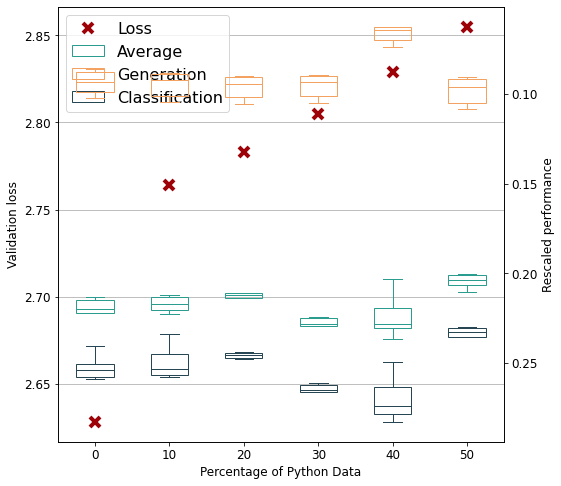

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Read from https://huggingface.co/datablations/lm1-2b8-55b-c4py/tensorboard
# Smoothing: 0.999
# C4 50 - 100
C4LOSSES = list(reversed([2.855, 2.829, 2.805, 2.783, 2.764, 2.628]))
PROPORTIONS = list(reversed([100 - x for x in list(range(50, 110, 10))]))
POSITIONS = list(range(6))

ALL_SCORES = []

ax.plot(POSITIONS, C4LOSSES, 'x', markersize=10, mew=4, color="#9D0208", label="Loss")
ax2 = ax.twinx()

bp_all = ax2.boxplot(
    MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-c4py"].values(), 
    positions=POSITIONS,
    patch_artist=True,
    vert=True,
    showfliers=False,
    boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
)
color = '#2A9D8F'
for key in ['boxes', 'medians', 'whiskers', 'caps', 'fliers']:
    for patch in bp_all[key]:
        patch.set_color(color)

bp_gen = ax2.boxplot(
    MODEL_TO_FEWSHOT_SCORES_GEN["lm1-2b8-55b-c4py"].values(), 
    positions=POSITIONS,
    patch_artist=True,
    vert=True,
    showfliers=False,
    boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
)
color = '#F4A261'
for key in ['boxes', 'medians', 'whiskers', 'caps', 'fliers']:
    for patch in bp_gen[key]:
        patch.set_color(color)

bp_acc = ax2.boxplot(
    MODEL_TO_FEWSHOT_SCORES_ACC["lm1-2b8-55b-c4py"].values(), 
    positions=POSITIONS,
    patch_artist=True,
    vert=True,
    showfliers=False,
    boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
)
color = '#264653'
for key in ['boxes', 'medians', 'whiskers', 'caps', 'fliers']:
    for patch in bp_acc[key]:
        patch.set_color(color)        


ax.set_xlabel("Percentage of Python Data", fontsize=12)
ax.set_ylabel("Validation loss", fontsize=12)
ax2.set_ylabel("Rescaled performance", fontsize=12)

ax2.set_ylim(list(reversed(ax2.get_ylim())))

ax.set_xticks(POSITIONS, PROPORTIONS, fontsize=12)
#ax.set_xlim((0, 5))

ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
# Add box to legend; https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes
handles = handles[:1] + bp_all["boxes"][:1] + bp_gen["boxes"][:1] + bp_acc["boxes"][:1]
labels = [str(labels[0])] + ["Average", "Generation", "Classification"]
ax.legend(handles, labels, prop={'size': 16}, title_fontproperties={'weight':'bold'})

plt.savefig(f"lm1-2b8-55b-c4py.pdf", bbox_inches="tight")
plt.show()

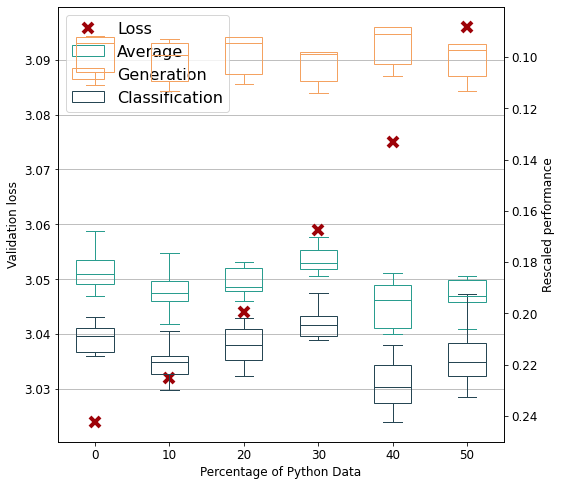

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Read from https://huggingface.co/datablations/lm1-2b8-55b-oscarpy/tensorboard
# Smoothing: 0.999
# OSCAR 50 - 90
OSCARLOSSES = [2.281, 2.245, 2.218, 2.192, 2.17, 2.15] # Last one is extrapolated - They used a slightly different val set
C4LOSSES = list(reversed([3.096, 3.075, 3.059, 3.044, 3.032, 3.024]))
PROPORTIONS = list(reversed([100 - x for x in list(range(50, 110, 10))]))
POSITIONS = list(range(6))

ALL_SCORES = []

ax.plot(POSITIONS, C4LOSSES, 'x', markersize=10, mew=4, color="#9D0208", label="Loss")
ax2 = ax.twinx()

bp_all = ax2.boxplot(
    MODEL_TO_FEWSHOT_SCORES["lm1-2b8-55b-oscarpy"].values(), 
    positions=POSITIONS,
    patch_artist=True,
    vert=True,
    showfliers=False,
    boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
)
color = '#2A9D8F'
for key in ['boxes', 'medians', 'whiskers', 'caps', 'fliers']:
    for patch in bp_all[key]:
        patch.set_color(color)

bp_gen = ax2.boxplot(
    MODEL_TO_FEWSHOT_SCORES_GEN["lm1-2b8-55b-oscarpy"].values(), 
    positions=POSITIONS,
    patch_artist=True,
    vert=True,
    showfliers=False,
    boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
)
color = '#F4A261'
for key in ['boxes', 'medians', 'whiskers', 'caps', 'fliers']:
    for patch in bp_gen[key]:
        patch.set_color(color)

bp_acc = ax2.boxplot(
    MODEL_TO_FEWSHOT_SCORES_ACC["lm1-2b8-55b-oscarpy"].values(), 
    positions=POSITIONS,
    patch_artist=True,
    vert=True,
    showfliers=False,
    boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
)
color = '#264653'
for key in ['boxes', 'medians', 'whiskers', 'caps', 'fliers']:
    for patch in bp_acc[key]:
        patch.set_color(color)           

ax.set_xlabel("Percentage of Python Data", fontsize=12)
ax.set_ylabel("Validation loss", fontsize=12)
ax2.set_ylabel("Rescaled performance", fontsize=12)

ax2.set_ylim(list(reversed(ax2.get_ylim())))

ax.set_xticks(POSITIONS, PROPORTIONS, fontsize=12)
#ax.set_xlim((0, 5))

ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
# Add box to legend; https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes
handles = handles[:1] + bp_all["boxes"][:1] + bp_gen["boxes"][:1] + bp_acc["boxes"][:1]
labels = [str(labels[0])] + ["Average", "Generation", "Classification"]
ax.legend(handles, labels, prop={'size': 16}, title_fontproperties={'weight':'bold'})

plt.savefig(f"lm1-2b8-55b-oscarpy.pdf", bbox_inches="tight")
plt.show()